In [1]:
import tensorflow as tf

In [2]:
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
data,metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)

In [4]:
train,test=data['train'],data['test']

In [5]:
category = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal',
            'Shirt','Sneaker','Bag','Ankle boot']

In [6]:
n_train=metadata.splits['train'].num_examples
print(f'Training dataset size= {n_train}')

n_test=metadata.splits['test'].num_examples
print(f'Test dataset size= {n_test}')

Training dataset size= 60000
Test dataset size= 10000


In [7]:
def normalise(images, labels):
    images=tf.cast(images,tf.float32)
    images/=255
    return images,labels

In [8]:
train=train.map(normalise)
test=test.map(normalise)

In [9]:
train=train.cache()
test=test.cache()
# The first time you use the dataset, the images will be loaded from disk
# Caching will keep them in memory, making training faster

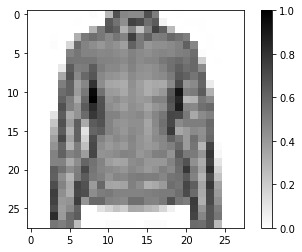

In [10]:
for image,label in test.take(1):
    break
    
image=image.numpy().reshape((28,28))

plt.figure()
plt.imshow(image,cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

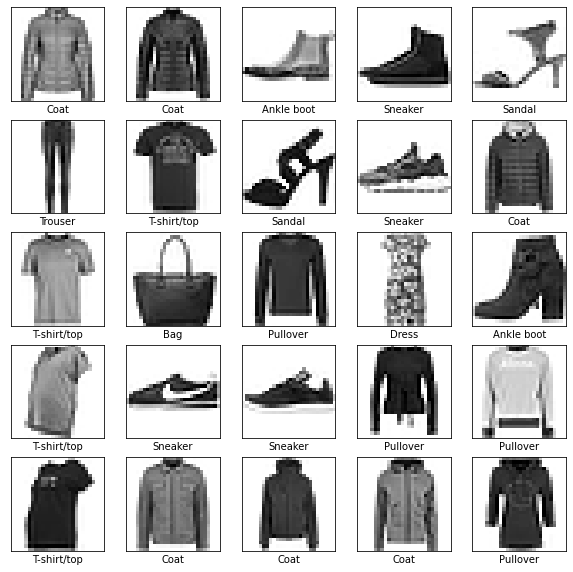

In [11]:
plt.figure(figsize=(10,10))
i=0
for (image,label) in test.take(25):
    image=image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image,cmap=plt.cm.binary)
    plt.xlabel(category[label])
    i+=1
plt.show()    

In [12]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [13]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])

Train the model

First, we define the iteration behavior for the train dataset:

    1) Repeat forever by specifying dataset.repeat() (the epochs parameter described below limits how long we perform training).
    2) The dataset.shuffle(60000) randomizes the order so our model cannot learn anything from the order of the examples.
    3) And dataset.batch(32) tells model.fit to use batches of 32 images and labels when updating the model variables.

Training is performed by calling the model.fit method:

    1) Feed the training data to the model using train_dataset.
    2) The model learns to associate images and labels.
    3) The epochs=5 parameter limits training to 5 full iterations of the training dataset, so a total of 5 * 60000 = 300000 examples.


In [14]:
batch_size=32
train=train.cache().repeat().shuffle(n_train).batch(batch_size)
test=test.cache().batch(batch_size)

In [15]:
model.fit(train,epochs=5,steps_per_epoch=math.ceil(n_train/batch_size))

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4920 - accuracy: 0.8279: 0s - loss: 0.5
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3702 - accuracy: 0.8658
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3362 - accuracy: 0.8777
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3092 - accuracy: 0.8862
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2951 - accuracy: 0.8941


In [16]:
test_loss,test_accuracy= model.evaluate(test,steps=math.ceil(n_test/32))
print('Accuracy on test dataset:',test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.3495 - accuracy: 0.8733
Accuracy on test dataset: 0.8733000159263611


In [17]:
for test_images,test_labels in test.take(1):
    test_images=test_images.numpy()
    test_labels=test_labels.numpy()
    prediction=model.predict(test_images)

In [18]:
prediction.shape

(32, 10)

In [19]:
prediction[0]

array([1.4297009e-04, 3.5335986e-05, 4.2543292e-02, 1.9131194e-05,
       8.6718243e-01, 2.4210435e-08, 9.0072230e-02, 1.0826270e-09,
       4.6525392e-06, 3.9669512e-08], dtype=float32)

In [22]:
np.argmax(prediction[0])

4

In [46]:
print(test_labels[0])
category[test_labels[0]]

4


'Coat'

In [56]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(category[predicted_label],
                                100*np.max(predictions_array),
                                category[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

4
4


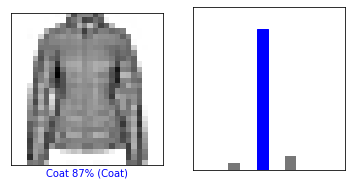

In [57]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
print(np.argmax(prediction[0]))
print(test_labels[0])
plot_image(i,prediction,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,prediction,test_labels)

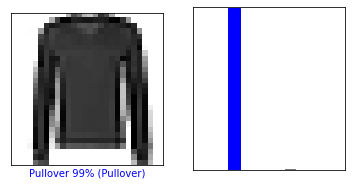

In [58]:
i=12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,prediction,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,prediction,test_labels)

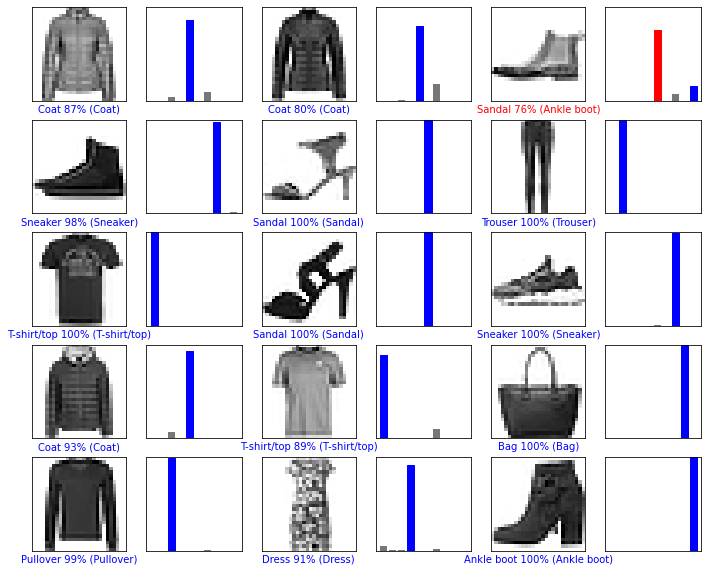

In [59]:
m=5
n=3
n_images=m*n
plt.figure(figsize=(2*2*n,2*m))
for i in range(n_images):
    plt.subplot(m,2*n,2*i+1)
    plot_image(i,prediction,test_labels,test_images)
    plt.subplot(m,2*n,2*i+2)
    plot_value_array(i,prediction,test_labels)